In [6]:
#Exercici 1

import pandas as pd
from sklearn.model_selection import train_test_split

# carreguem el dataset
col_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
dataset = pd.read_csv("housing data.csv", names=col_names)

# separam el dataset en conjunts de train i test
X = dataset.drop("MEDV", axis=1)  # seleccionam totes les columnes excepte MEDV com a variables independents
y = dataset["MEDV"]  # seleccionam MEDV com a variable dependent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# estudiem els conjunts de dades de forma descriptiva
X_train_describe = pd.DataFrame(X_train).describe()
X_test_describe = pd.DataFrame(X_test).describe()

print(X_train_describe)
print(X_test_describe)


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.609125   11.569307   10.985050    0.071782    0.556484    6.315891   
std      8.875058   23.152481    6.894618    0.258447    0.117704    0.709452   
min      0.009060    0.000000    0.740000    0.000000    0.385000    3.863000   
25%      0.081437    0.000000    5.130000    0.000000    0.452000    5.890500   
50%      0.261390    0.000000    8.560000    0.000000    0.538000    6.210000   
75%      3.202962   20.000000   18.100000    0.000000    0.631000    6.636750   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    68.556436    3.808195    9.356436  404.032178   18.318317  356.278342   
std     27.994922    2.1312

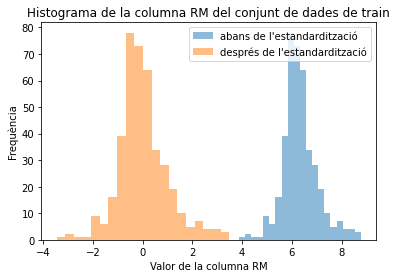

                 0             1             2             3             4   \
count  4.040000e+02  4.040000e+02  4.040000e+02  4.040000e+02  4.040000e+02   
mean  -5.248827e-17  8.354153e-17 -8.656442e-18 -6.732788e-17 -5.090812e-16   
std    1.001240e+00  1.001240e+00  1.001240e+00  1.001240e+00  1.001240e+00   
min   -4.061414e-01 -5.003201e-01 -1.487791e+00 -2.780887e-01 -1.458711e+00   
25%   -3.979761e-01 -5.003201e-01 -8.502733e-01 -2.780887e-01 -8.887828e-01   
50%   -3.776748e-01 -5.003201e-01 -3.521669e-01 -2.780887e-01 -1.572334e-01   
75%   -4.582119e-02  3.645893e-01  1.033237e+00 -2.780887e-01  6.338607e-01   
max    9.630689e+00  3.824227e+00  2.433163e+00  3.595975e+00  2.675394e+00   

                 5             6             7             8             9   \
count  4.040000e+02  4.040000e+02  4.040000e+02  4.040000e+02  4.040000e+02   
mean  -2.741207e-16 -4.858600e-16  4.919057e-17 -9.041173e-17 -1.534457e-16   
std    1.001240e+00  1.001240e+00  1.001240e+00  1.

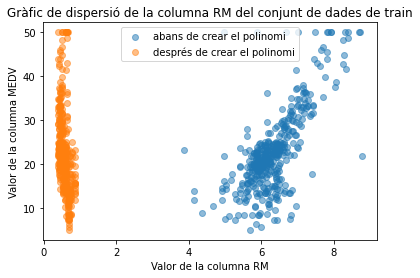

          0           1           2           3           4           5   \
count  404.0  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     1.0    3.609125   11.569307   10.985050    0.071782    0.556484   
std      0.0    8.875058   23.152481    6.894618    0.258447    0.117704   
min      1.0    0.009060    0.000000    0.740000    0.000000    0.385000   
25%      1.0    0.081437    0.000000    5.130000    0.000000    0.452000   
50%      1.0    0.261390    0.000000    8.560000    0.000000    0.538000   
75%      1.0    3.202962   20.000000   18.100000    0.000000    0.631000   
max      1.0   88.976200  100.000000   27.740000    1.000000    0.871000   

               6           7           8           9           10          11  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     6.315891   68.556436    3.808195    9.356436  404.032178   18.318317   
std      0.709452   27.994922    2.131226    8.589721  166.172655    2.2

In [12]:
#Exercici 2 i 3


#Estandardització de les dades numèriques
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# histograma de la columna "RM" del conjunt de dades de train abans i després de l'estandardització
plt.hist(X_train["RM"], bins=20, alpha=0.5, label="abans de l'estandardització")
plt.hist(X_train_scaled[:, 5], bins=20, alpha=0.5, label="després de l'estandardització")
plt.title("Histograma de la columna RM del conjunt de dades de train")
plt.xlabel("Valor de la columna RM")
plt.ylabel("Frequència")
plt.legend()
plt.show()

X_train_scaled_describe = pd.DataFrame(X_train_scaled).describe()
print(X_train_scaled_describe)




#Creació de polinomis
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# gràfic de dispersió de la columna "RM" del conjunt de dades de train abans i després de crear el polinomi
plt.scatter(X_train["RM"], y_train, alpha=0.5, label="abans de crear el polinomi")
plt.scatter(X_train_poly[:, 5], y_train, alpha=0.5, label="després de crear el polinomi")
plt.title("Gràfic de dispersió de la columna RM del conjunt de dades de train")
plt.xlabel("Valor de la columna RM")
plt.ylabel("Valor de la columna MEDV")
plt.legend()
plt.show()

X_train_poly_describe = pd.DataFrame(X_train_poly).describe()
X_train_poly_describe_13cols = X_train_poly_describe.iloc[:, :13]
print(X_train_poly_describe_13cols)